# Machine learning models - flats

In [1]:
import pandas as pd
import xgboost as xg
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE, make_scorer
from sklearn.linear_model import LinearRegression
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from scikeras.wrappers import KerasClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./preprocessed_dataset_flats_1_1.csv', index_col = 0)
data.head()

,price,price_per_square_meter,area,number_of_rooms,finishing_standard,floor,rent,heating,market,building_type,...,has_garden,has_terrace,has_parking,is_furnished,has_lift,has_security_protection,is_duplex,has_basement,number_of_floors,age
0,950000.0,14175.0,67.02,3,2,6,0.067777,4,1,2,...,0,0,1,1,1,1,0,0,6,0.060465
1,264900.0,9811.0,27.00,1,2,5,0.051110,4,1,2,...,0,0,0,0,1,1,0,0,8,0.255814
2,464000.0,8000.0,58.00,3,2,2,0.038888,1,1,0,...,0,0,1,0,1,0,0,0,3,0.023256
3,199900.0,5666.0,35.28,2,2,4,0.046666,4,1,2,...,0,0,0,0,0,0,0,1,4,0.032558
4,299000.0,6229.0,48.00,3,2,5,0.074443,4,1,2,...,0,0,0,0,1,0,0,1,10,0.032558


In [3]:
# data = data.drop('price_per_square_meter', axis = 1) 
data = pd.read_csv('./preprocessed_dataset_flats.csv', index_col = 0)

### Split data into train and test datasets

In [4]:
X, y = data.drop('price', axis = 1),data['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 4)

### Linear regression

In [5]:
lin_reg = LinearRegression()

lin_reg.fit(train_X, train_y)

LinearRegression()

In [6]:
lin_reg_pred = lin_reg.predict(test_X)

#### Mead Squared Error for the linear regression model

In [7]:
print(sqrt(MSE(test_y, lin_reg_pred)))

190189.5678014132


In [8]:
lin_reg_coef = lin_reg.coef_[:len(lin_reg.coef_) - 1]
train_columns = train_X.drop('price_per_square_meter', axis = 1).columns
# to remove

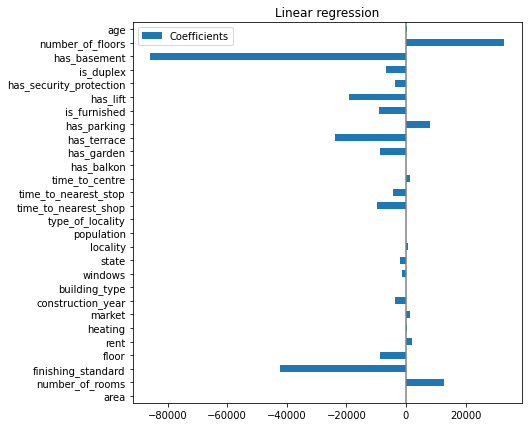

In [9]:
import matplotlib.pyplot as plt

coefs = pd.DataFrame(
   lin_reg_coef,
   columns=['Coefficients'], index=train_columns
)

coefs.plot(kind='barh', figsize=(9, 7))
plt.title('Linear regression')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

### XGBoost

In [10]:
xgb_r = xg.XGBRegressor(objective = 'reg:squarederror')

optimization_dict = {'max_depth': [2, 4, 6],
                     'n_estimators': [100, 200, 500],
                    'seed': [4, 8, 16]}

mse = make_scorer(MSE,greater_is_better=False)

xgb_grid_search_model = GridSearchCV(xgb_r, optimization_dict, scoring=mse, verbose=10)

xgb_grid_search_model.fit(train_X, train_y)

print(xgb_grid_search_model.best_score_)
print(xgb_grid_search_model.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 1/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-3341094647.208 total time=   0.8s
[CV 2/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 2/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-3019015822.950 total time=   0.7s
[CV 3/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 3/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-2458661724.989 total time=   0.7s
[CV 4/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 4/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-2599304817.030 total time=   0.7s
[CV 5/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 5/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-2410470599.931 total time=   0.7s
[CV 1/5; 2/27] START max_depth=2,

[CV 1/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-1648368287.351 total time=   2.1s
[CV 2/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 2/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-998193731.464 total time=   2.4s
[CV 3/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 3/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-1221804675.310 total time=   2.2s
[CV 4/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 4/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-671391217.817 total time=   2.1s
[CV 5/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 5/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-841186803.990 total time=   2.1s
[CV 1/5; 11/27] START max_depth=4, n_estimators=100, seed=8.....................
[CV 1/5; 11/27] END max_depth=4, n_estimators=100, seed=8;, score=-1648368287.351 total time=

[CV 2/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-1053660853.295 total time=   3.2s
[CV 3/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 3/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-1325157777.452 total time=   2.9s
[CV 4/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 4/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-427272633.595 total time=   2.8s
[CV 5/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 5/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-457258294.752 total time=   3.3s
[CV 1/5; 20/27] START max_depth=6, n_estimators=100, seed=8.....................
[CV 1/5; 20/27] END max_depth=6, n_estimators=100, seed=8;, score=-1341016751.667 total time=   3.2s
[CV 2/5; 20/27] START max_depth=6, n_estimators=100, seed=8.....................
[CV 2/5; 20/27] END max_depth=6, n_estimators=100, seed=8;, score=-1053660853.295 total time

In [11]:
xgb_pred = xgb_grid_search_model.predict(test_X)

In [53]:
import joblib
joblib.dump(xgb_grid_search_model, "grid_search_model.save")

['grid_search_model.save']

#### Mead Squared Error for the linear regression model

In [12]:
print(sqrt(MSE(test_y, xgb_pred)))

19857.244100963322


### Neural networks

In [31]:
nn_model = keras.Sequential(
    [
        layers.Dense(256, input_dim = len(data.columns) - 1, activation = 'relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation = 'linear')
    ]
)

nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               7680      
                                                                 
 batch_normalization_5 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dropout_8 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 128)              

In [32]:
nn_model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mse', 'mae'])

In [33]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

In [45]:
history = nn_model.fit(train_X, train_y, epochs = 216, batch_size = 256, validation_split = 0.2, callbacks = [earlystopping])

Epoch 1/216
188/188 [==============================] - 1s 5ms/step - loss: 117962539008.0000 - mse: 117962539008.0000 - mae: 172803.3594 - val_loss: 261983371264.0000 - val_mse: 261983371264.0000 - val_mae: 209532.7656
Epoch 2/216
188/188 [==============================] - 1s 5ms/step - loss: 128610140160.0000 - mse: 128610140160.0000 - mae: 179002.3750 - val_loss: 99365830656.0000 - val_mse: 99365830656.0000 - val_mae: 156153.7344
Epoch 3/216
188/188 [==============================] - 1s 5ms/step - loss: 125650919424.0000 - mse: 125650919424.0000 - mae: 176245.0469 - val_loss: 117840920576.0000 - val_mse: 117840920576.0000 - val_mae: 153214.3594
Epoch 4/216
188/188 [==============================] - 1s 5ms/step - loss: 122501242880.0000 - mse: 122501242880.0000 - mae: 174482.1406 - val_loss: 138453286912.0000 - val_mse: 138453286912.0000 - val_mae: 149137.4375
Epoch 5/216
188/188 [==============================] - 1s 5ms/step - loss: 117606096896.0000 - mse: 117606096896.0000 - mae: 1

In [46]:
nn_pred = nn_model.predict(test_X)

In [47]:
print(sqrt(MSE(test_y, nn_pred)))

489574.8496451499


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


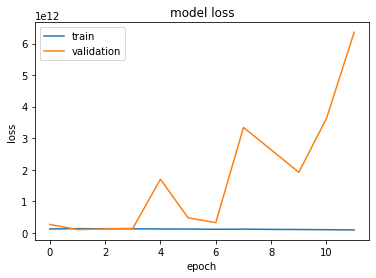

In [48]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
history_2 = nn_model.fit(train_X, train_y, epochs = 1000, batch_size = 100, validation_split = 0.2, callbacks = [earlystopping])

Epoch 1/1000
481/481 [==============================] - 1s 3ms/step - loss: 132382498816.0000 - mse: 132382498816.0000 - mae: 179757.7656 - val_loss: 126468595712.0000 - val_mse: 126468595712.0000 - val_mae: 159431.2188
Epoch 2/1000
481/481 [==============================] - 2s 3ms/step - loss: 129544527872.0000 - mse: 129544527872.0000 - mae: 178001.2031 - val_loss: 521991847936.0000 - val_mse: 521991847936.0000 - val_mae: 176617.2500
Epoch 3/1000
481/481 [==============================] - 2s 3ms/step - loss: 129683169280.0000 - mse: 129683169280.0000 - mae: 180222.4062 - val_loss: 151750017024.0000 - val_mse: 151750017024.0000 - val_mae: 151605.7812
Epoch 4/1000
481/481 [==============================] - 2s 3ms/step - loss: 125308698624.0000 - mse: 125308698624.0000 - mae: 176772.0000 - val_loss: 1740911935488.0000 - val_mse: 1740911673344.0000 - val_mae: 170969.2344
Epoch 5/1000
481/481 [==============================] - 2s 3ms/step - loss: 131073531904.0000 - mse: 131073531904.0000

In [50]:
nn_pred_2 = nn_model.predict(test_X)

In [51]:
print(sqrt(MSE(test_y, nn_pred_2)))

1263842.1141725262


dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


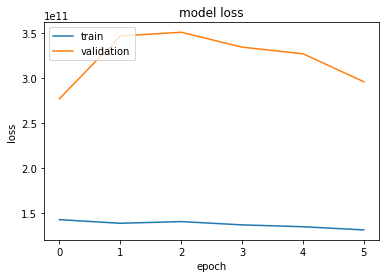

In [23]:
print(history_2.history.keys())
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()